# Purpose
to explore data stored in csvs of RFID check ins from stony ford wedge 6

# Imports

In [1]:
import numpy as np
import pandas as pd
import glob, os, sys
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
c1=pd.read_csv('../data/2021_stonyford_wedge6_block1.csv')
c2=pd.read_csv('../data/2021_stonyford_wedge6_block2.csv')
meta=pd.read_csv('../data/2021_stonyford_wedge6_metadata.csv')

# Functions

# Use case

# Procedure

# Exploration

In [3]:
meta

,Cage,Genotype,Left ear tag,Right ear tag,RFID Tag,Location,Wedge,Sex,Lost RFID 1,Lost RFID 2,Block
0,3,C57,186.0,357,51 48 50 51 48,SF,6,Female,False,False,Block 1
1,3,C57,187.0,337,51 48 51 57 57,SF,6,Female,False,False,Block 1
2,4,C57,NaN,358,51 48 51 53 55,SF,6,Female,False,False,Block 1
3,4,C57,194.0,344,51 48 51 48 50,SF,6,Female,False,False,Block 1
4,4,C57,195.0,345,51 48 50 56 50,SF,6,Female,False,False,Block 1
5,5,C57,NaN,356,51 48 50 51 57,SF,6,Female,False,False,Block 1
6,5,C57,199.0,349,51 48 50 54 55,SF,6,Female,True,False,Block 1
7,5,C57,200.0,350,51 48 51 55 49,SF,6,Female,False,False,Block 1
8,6,C57,126.0,376,51 48 50 48 49,SF,6,Female,False,False,Block 1
9,6,C57,130.0,380,51 48 51 49 48,SF,6,Female,False,False,Block 1


In [14]:
colnms=list(meta.columns)

colnms[2]='left_ear_tag'
colnms[3]='right_ear_tag'
colnms[4]='RFID_tag'
colnms[8]='lostRFID1'
colnms[9]='lostRFID2'

meta.columns=colnms
meta.head()

,Cage,Genotype,left_ear_tag,right_ear_tag,RFID_tag,Location,Wedge,Sex,lostRFID1,lostRFID2,Block
0,3,C57,186.0,357,51 48 50 51 48,SF,6,Female,False,False,Block 1
1,3,C57,187.0,337,51 48 51 57 57,SF,6,Female,False,False,Block 1
2,4,C57,NaN,358,51 48 51 53 55,SF,6,Female,False,False,Block 1
3,4,C57,194.0,344,51 48 51 48 50,SF,6,Female,False,False,Block 1
4,4,C57,195.0,345,51 48 50 56 50,SF,6,Female,False,False,Block 1


In [15]:
meta_clean = meta.loc[(meta["lostRFID1"] != True)]
meta_clean.head()

,Cage,Genotype,left_ear_tag,right_ear_tag,RFID_tag,Location,Wedge,Sex,lostRFID1,lostRFID2,Block
0,3,C57,186.0,357,51 48 50 51 48,SF,6,Female,False,False,Block 1
1,3,C57,187.0,337,51 48 51 57 57,SF,6,Female,False,False,Block 1
2,4,C57,NaN,358,51 48 51 53 55,SF,6,Female,False,False,Block 1
3,4,C57,194.0,344,51 48 51 48 50,SF,6,Female,False,False,Block 1
4,4,C57,195.0,345,51 48 50 56 50,SF,6,Female,False,False,Block 1


In [21]:
good_RFIDs=[row.RFID_tag for index,row in meta_clean.iterrows()]

In [22]:
good_RFIDs

['51 48 50 51 48',
 '51 48 51 57 57',
 '51 48 51 53 55',
 '51 48 51 48 50',
 '51 48 50 56 50',
 '51 48 50 51 57',
 '51 48 51 55 49',
 '51 48 50 48 49',
 '51 48 51 49 48',
 '51 48 51 56 51',
 '51 48 51 52 56',
 '51 48 51 56 52',
 '51 48 50 50 50',
 '51 48 51 50 50',
 '48 54 51 55 53 52',
 '49 50 55 56 54 57',
 '48 54 51 55 51 56',
 '49 51 48 50 56 54',
 '48 54 51 55 49 49',
 '48 54 49 48 49 57',
 '48 54 51 55 54 56',
 '48 54 51 55 54 49',
 '48 54 51 55 52 56',
 '48 54 51 55 53 49',
 '48 54 51 55 54 55',
 '48 54 51 55 57 54']

In [ ]:
new_timestamps=[]
for index,row in c1.iterrows():
    timestamp=c1.Timestamp[index]
    timestamp_list=timestamp.split(' ')
    vals=[]
    date=timestamp_list[0].split('/')
    time=timestamp_list[1].split(':')
    final_str='{}{}{}{}{}'.format(date[0].zfill(2),date[1].zfill(2),date[2].zfill(2),time[0].zfill(2),time[1].zfill(2))
    new_timestamps.append(int(final_str))
c1.Timestamp=new_timestamps


In [160]:

new_timestamps=[]
for index,row in c2.iterrows():
    timestamp=c2.Timestamp[index]
    timestamp_list=timestamp.split(' ')
    vals=[]
    date=timestamp_list[0].split('/')
    time=timestamp_list[1].split(':')
    final_str='{}{}{}{}{}'.format(date[0].zfill(2),date[1].zfill(2),date[2].zfill(2),time[0].zfill(2),time[1].zfill(2))
    new_timestamps.append(int(final_str))
c2.Timestamp=new_timestamps


In [201]:
# for each animal, how many check ins at the feeder?
# for each animal, did they stop visiting the feeder at any point?/when did they visit the feeder?

animal_and_num={}
animal_and_vals={}

for animal in good_RFIDs:
    # for each animal
    animal_indices=[]
    print(animal)
    for index,row in c1.iterrows():
        if row.RFID[-14:]==animal[-14:] and row.Location=='Feeder':
            animal_indices.append(row.Timestamp)
    print("length of {} is {}".format(animal,len(animal_indices)))
    if len(animal_indices) > 0:
        animal_and_num[animal]=len(animal_indices)
        animal_and_vals[animal]=animal_indices

51 48 50 51 48
length of 51 48 50 51 48 is 812
51 48 51 57 57
length of 51 48 51 57 57 is 659
51 48 51 53 55
length of 51 48 51 53 55 is 852
51 48 51 48 50
length of 51 48 51 48 50 is 639
51 48 50 56 50
length of 51 48 50 56 50 is 574
51 48 50 51 57
length of 51 48 50 51 57 is 764
51 48 51 55 49
length of 51 48 51 55 49 is 772
51 48 50 48 49
length of 51 48 50 48 49 is 705
51 48 51 49 48
length of 51 48 51 49 48 is 632
51 48 51 56 51
length of 51 48 51 56 51 is 780
51 48 51 52 56
length of 51 48 51 52 56 is 837
51 48 51 56 52
length of 51 48 51 56 52 is 734
51 48 50 50 50
length of 51 48 50 50 50 is 571
51 48 51 50 50
length of 51 48 51 50 50 is 710
48 54 51 55 53 52
length of 48 54 51 55 53 52 is 0
49 50 55 56 54 57
length of 49 50 55 56 54 57 is 0
48 54 51 55 51 56
length of 48 54 51 55 51 56 is 0
49 51 48 50 56 54
length of 49 51 48 50 56 54 is 0
48 54 51 55 49 49
length of 48 54 51 55 49 49 is 0
48 54 49 48 49 57
length of 48 54 49 48 49 57 is 0
48 54 51 55 54 56
length of 48 54 51

In [202]:
# for each animal, how many check ins at the feeder?
# for each animal, did they stop visiting the feeder at any point?/when did they visit the feeder?

animal_and_num_2={}
animal_and_vals_2={}

for animal in good_RFIDs:
    # for each animal
    animal_indices=[]
    print(animal)
    for index,row in c2.iterrows():
        if row.RFID[-14:]==animal[-14:] and row.Location=='Feeder':
            animal_indices.append(row.Timestamp)
    print("length of {} is {}".format(animal,len(animal_indices)))
    if len(animal_indices) > 0:
        animal_and_num_2[animal]=len(animal_indices)
        animal_and_vals_2[animal]=animal_indices

51 48 50 51 48
length of 51 48 50 51 48 is 0
51 48 51 57 57
length of 51 48 51 57 57 is 0
51 48 51 53 55
length of 51 48 51 53 55 is 0
51 48 51 48 50
length of 51 48 51 48 50 is 0
51 48 50 56 50
length of 51 48 50 56 50 is 0
51 48 50 51 57
length of 51 48 50 51 57 is 0
51 48 51 55 49
length of 51 48 51 55 49 is 0
51 48 50 48 49
length of 51 48 50 48 49 is 0
51 48 51 49 48
length of 51 48 51 49 48 is 0
51 48 51 56 51
length of 51 48 51 56 51 is 0
51 48 51 52 56
length of 51 48 51 52 56 is 0
51 48 51 56 52
length of 51 48 51 56 52 is 0
51 48 50 50 50
length of 51 48 50 50 50 is 0
51 48 51 50 50
length of 51 48 51 50 50 is 0
48 54 51 55 53 52
length of 48 54 51 55 53 52 is 0
49 50 55 56 54 57
length of 49 50 55 56 54 57 is 389
48 54 51 55 51 56
length of 48 54 51 55 51 56 is 30
49 51 48 50 56 54
length of 49 51 48 50 56 54 is 783
48 54 51 55 49 49
length of 48 54 51 55 49 49 is 766
48 54 49 48 49 57
length of 48 54 49 48 49 57 is 714
48 54 51 55 54 56
length of 48 54 51 55 54 56 is 685
48

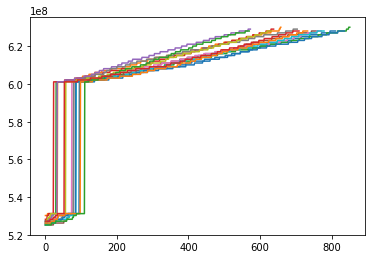

In [203]:
for animal in animal_and_vals.keys():
    plt.plot(animal_and_vals[animal])

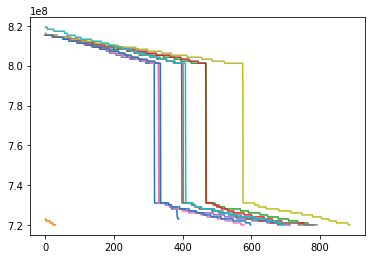

In [204]:
for animal in animal_and_vals_2.keys():
    plt.plot(animal_and_vals_2[animal])

In [211]:
c2.head()

,Unnamed: 0,Timestamp,RFID,Wedge,Reader,Location,Mouse,Genotype,AssignedWedge,Date,Week,Day,Hour,Minute,Second
0,1,819210515,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,5,15,5
1,2,819210501,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,5,1,14
2,3,819210438,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,4,38,30
3,4,819210419,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,4,19,7
4,5,819210318,48 48 48 48 54 51 55 54 55,Wedge 6,41,Feeder,41,C57,Wedge 6,8/19/21,Week 5,19-Aug,3,18,0


In [207]:
# for a given animal, get more info - plot x=day, y=#
animal

'48 54 51 55 57 54'

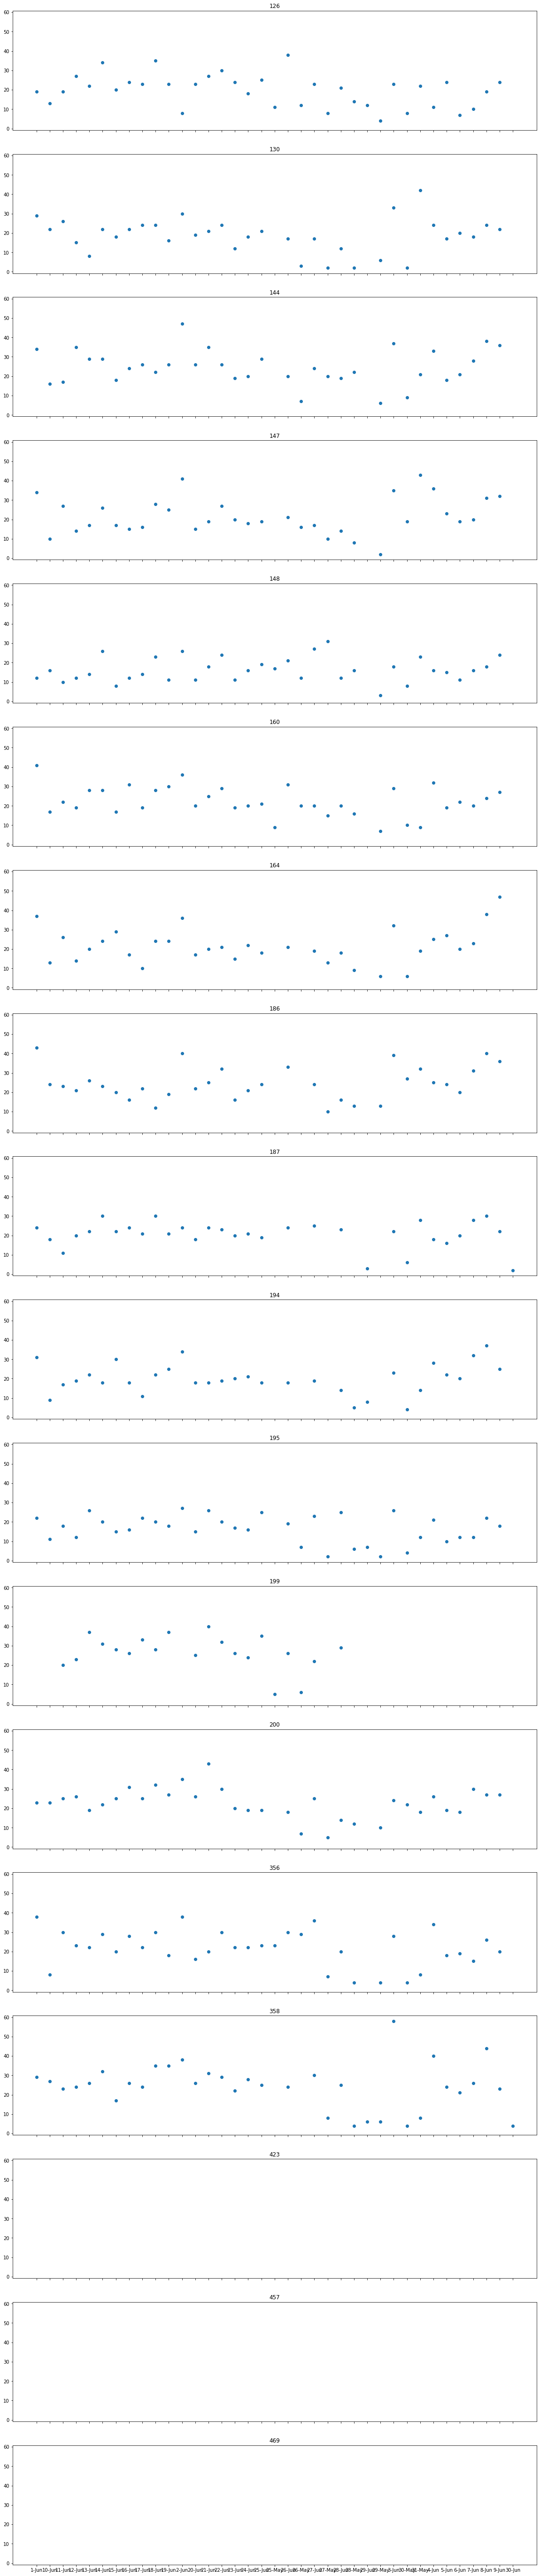

In [286]:
n_max=len(np.unique(c1.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,100),sharex=True,sharey=True)

for animal in np.unique(c1.Mouse):
    n+=1
    c1_sub=c1[c1.Mouse==animal]
    c1_sub=c1_sub[c1_sub.Location=="Feeder"]
    c1_sub=c1_sub[c1_sub.AssignedWedge=='Wedge 6']
    forplot=c1_sub[["Day","Hour"]].groupby(["Day"]).count()
    axs[n].scatter(forplot.index,forplot["Hour"])
    axs[n].title.set_text(animal)


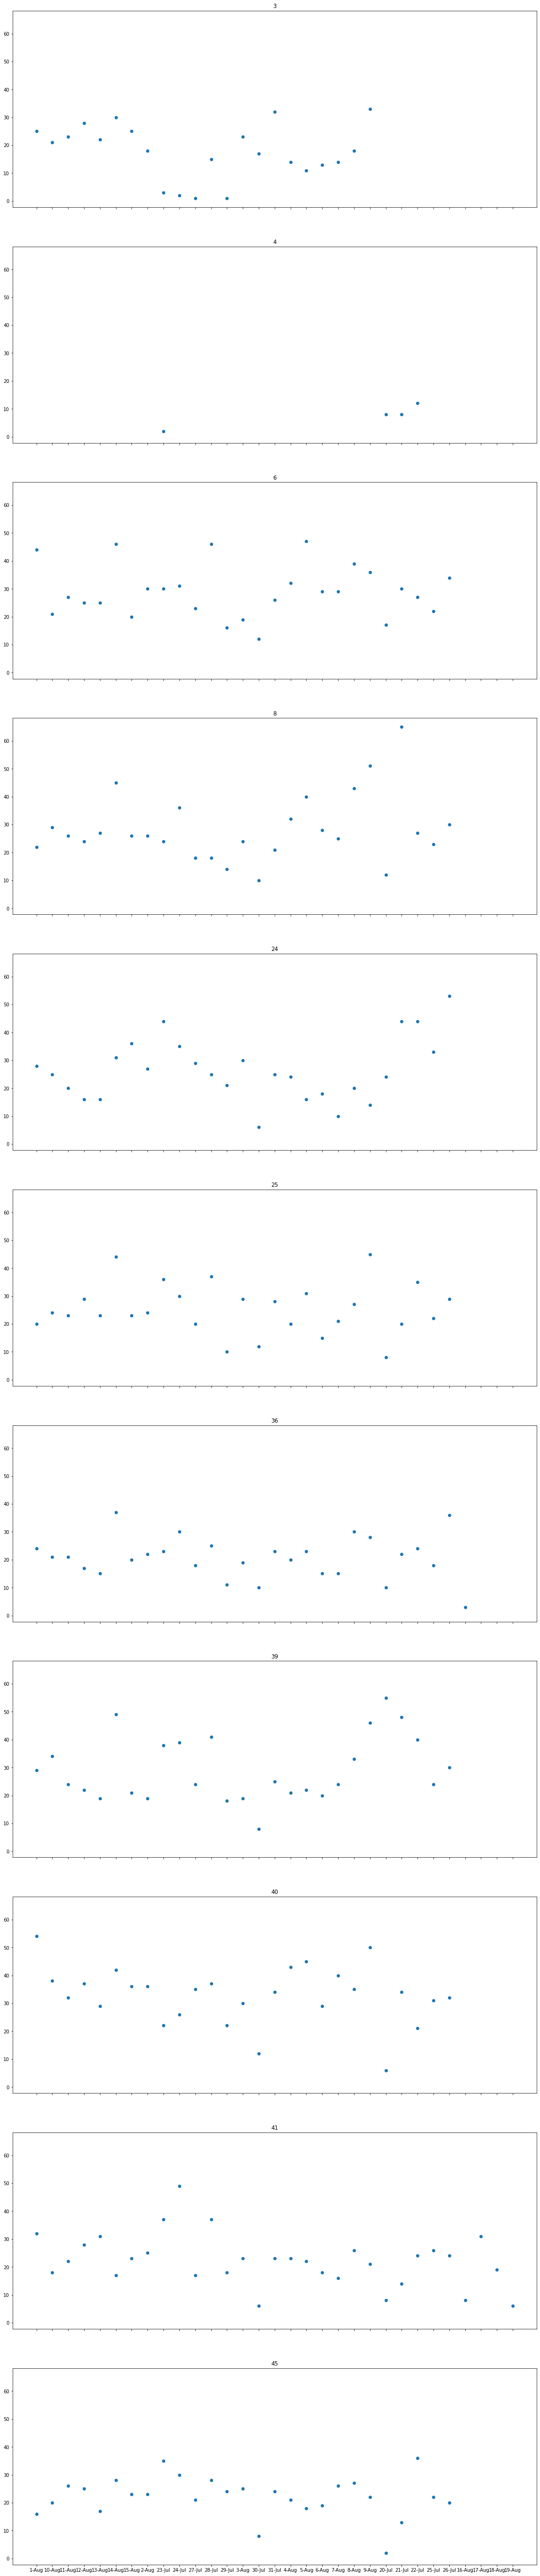

In [285]:
n_max=len(np.unique(c2.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,100),sharex=True,sharey=True)

for animal in np.unique(c2.Mouse):
    n+=1
    c2_sub=c2[c2.Mouse==animal]
    c2_sub=c2_sub[c2_sub.Location=="Feeder"]
    c2_sub=c2_sub[c2_sub.AssignedWedge=='Wedge 6']
    forplot=c2_sub[["Day","Hour"]].groupby(["Day"]).count()
    axs[n].scatter(forplot.index,forplot["Hour"])
    axs[n].title.set_text(animal)


In [331]:
c1_clean = c1[c1.Location=="Feeder"]
c1_clean=c1_clean[c1_clean.AssignedWedge=='Wedge 6']
c2_clean = c2[c2.Location=="Feeder"]
c2_clean=c2_clean[c2_clean.AssignedWedge=='Wedge 6']


In [332]:
c1_grouped=c1_clean[['Mouse','Week','Genotype']].groupby(['Mouse','Week'],as_index=False).agg('count')
c2_grouped=c2_clean[['Mouse','Week','Genotype']].groupby(['Mouse','Week'],as_index=False).agg('count')

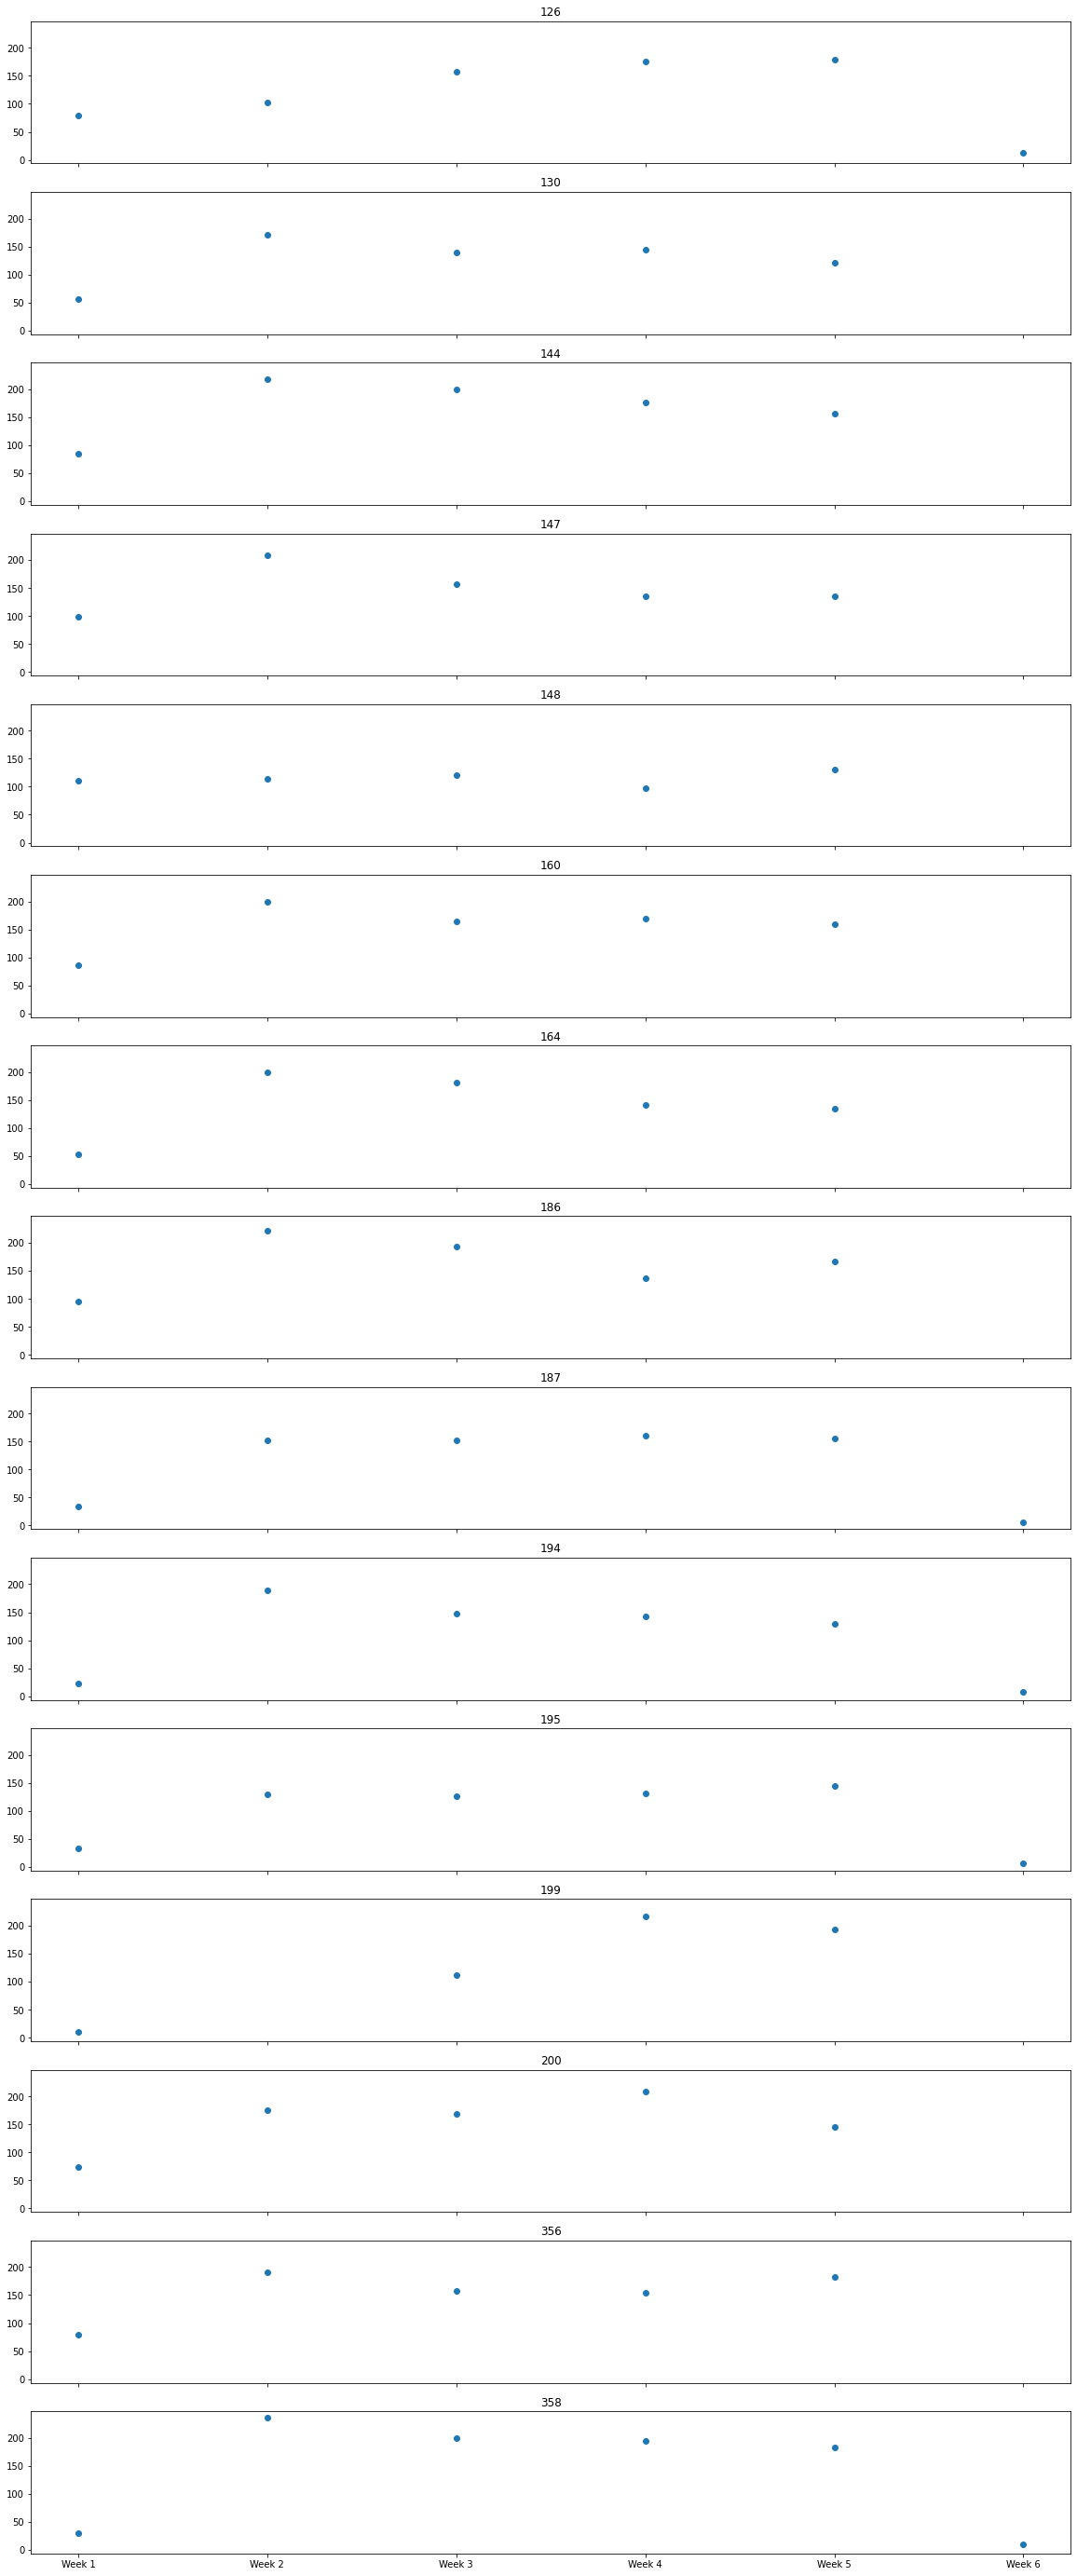

In [335]:
test=c1_grouped

n_max=len(np.unique(test.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,50),sharex=True,sharey=True)

for animal in np.unique(test.Mouse):
    n+=1
    forplot=test[test.Mouse==animal]
    axs[n].scatter(forplot.Week,forplot.Genotype)
    axs[n].title.set_text(animal)


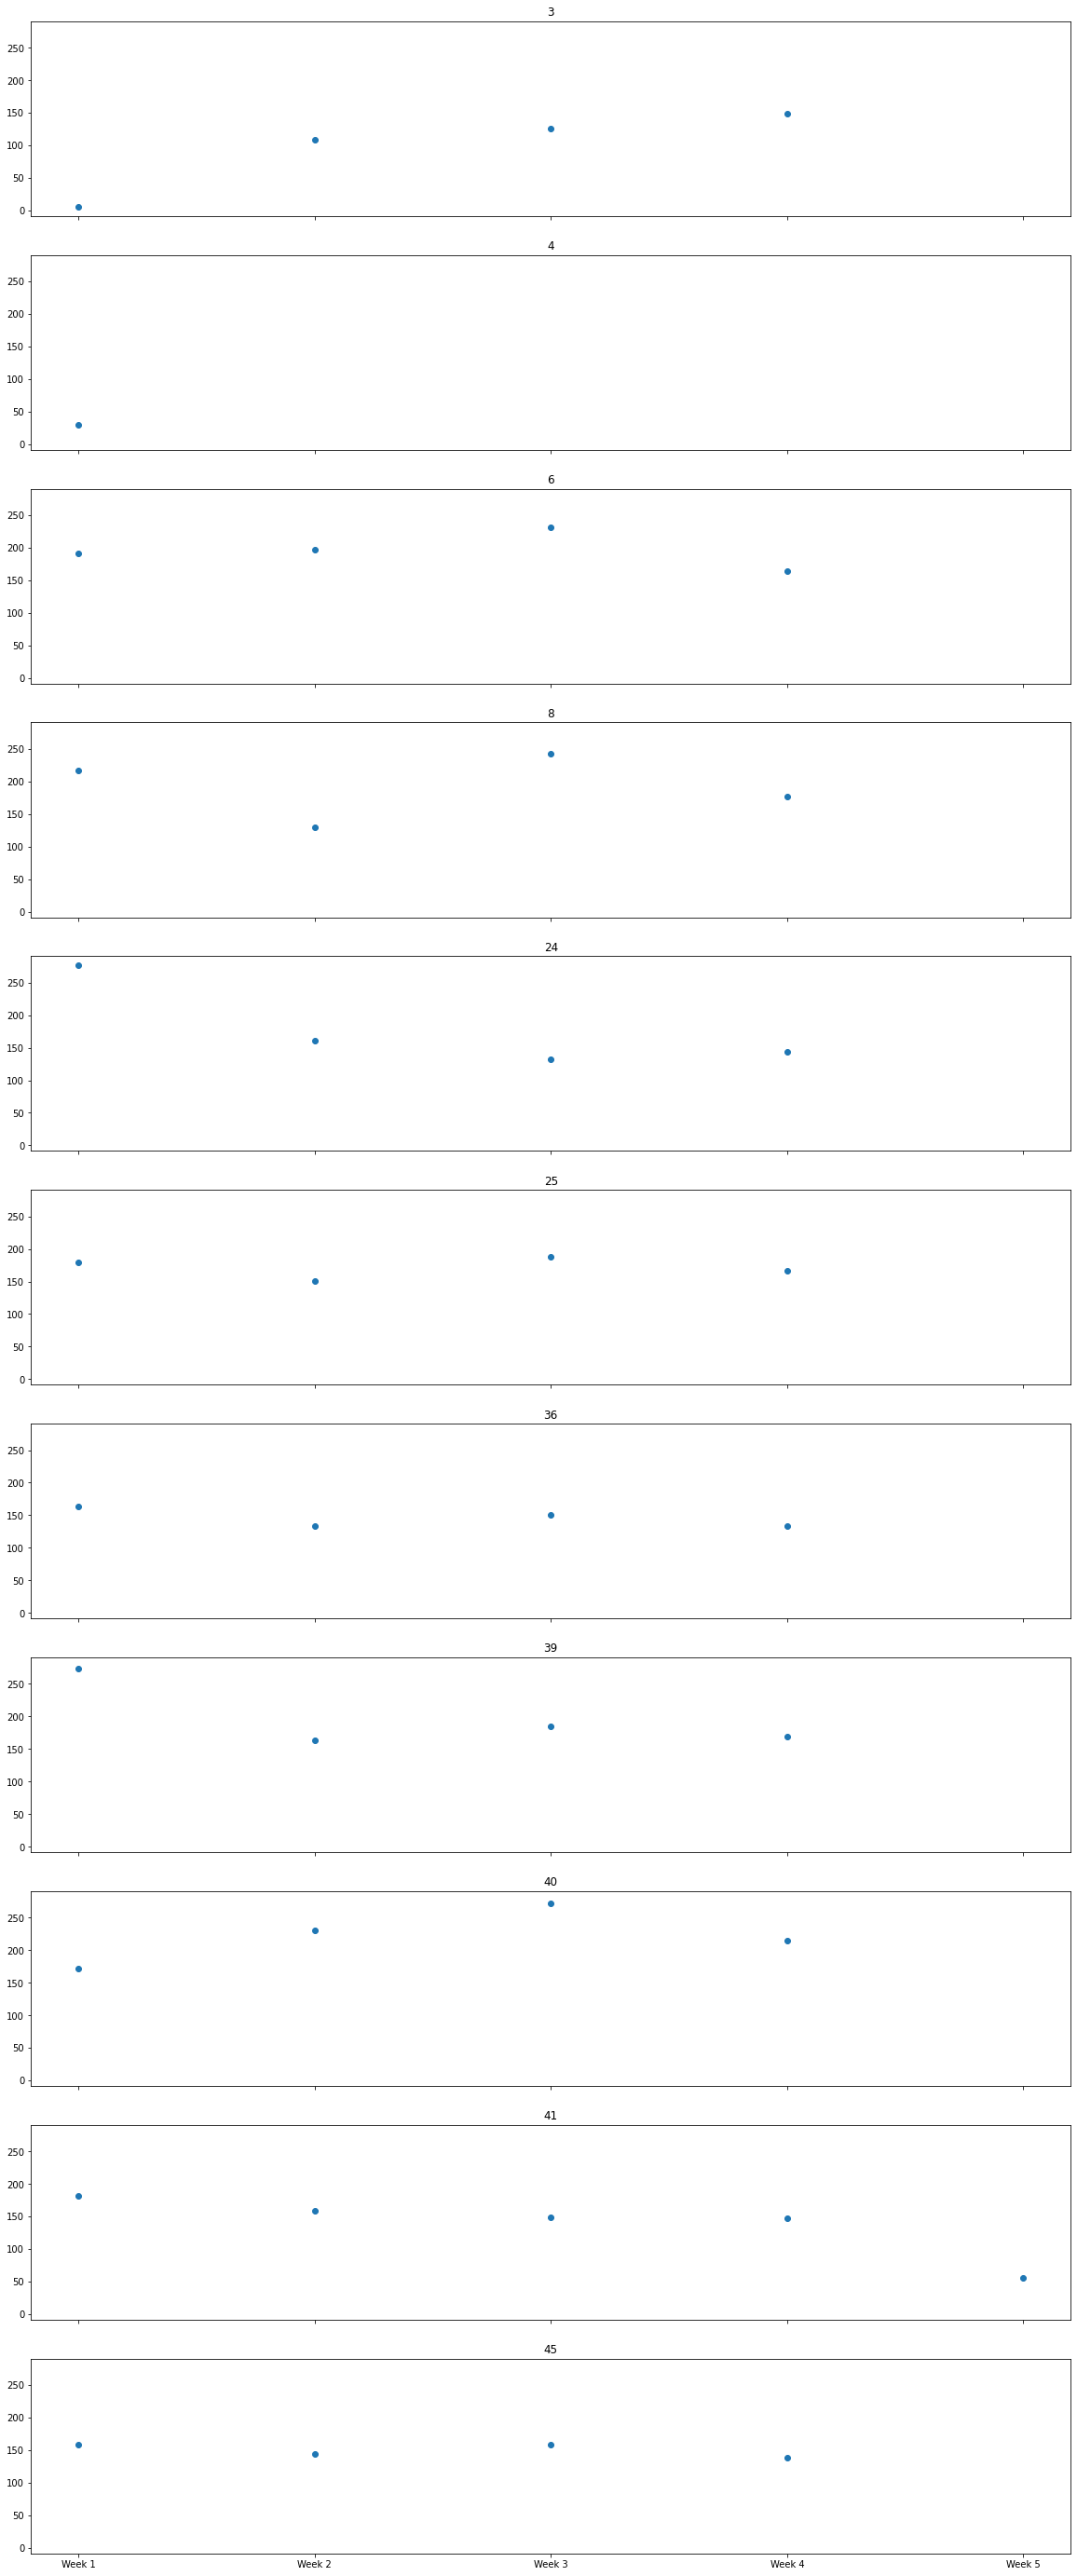

In [336]:
test=c2_grouped

n_max=len(np.unique(test.Mouse))
n=-1
fig, axs = plt.subplots(n_max,1,figsize=(20,50),sharex=True,sharey=True)

for animal in np.unique(test.Mouse):
    n+=1
    forplot=test[test.Mouse==animal]
    axs[n].scatter(forplot.Week,forplot.Genotype)
    axs[n].title.set_text(animal)
